___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
import category_encoders as ce
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from yellowbrick.classifier import PrecisionRecallCurve

In [67]:
df =  pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [68]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97268,66136.0,-1.009949,0.044978,1.655435,0.888770,0.929405,0.231742,0.999597,-0.550355,-0.072133,0.953071,1.265116,-0.628929,-1.640825,0.087013,1.257971,-0.565351,-0.382667,0.363220,0.894860,-0.064945,-0.078320,0.357108,-0.184778,-0.327241,0.408973,-0.215381,-0.872795,-0.519770,50.00,0
76843,56773.0,-0.406086,0.123484,0.860492,-3.124803,0.293131,-0.806247,0.855031,-0.195108,1.948813,-1.651696,-1.888224,-0.267072,-1.236309,-0.413246,-0.804778,-0.308523,-0.740445,-0.012832,-0.145605,-0.103691,-0.123245,0.122048,-0.302890,-0.569135,-0.054927,-0.334320,0.209516,-0.012732,11.30,0
75076,55887.0,1.180135,0.265829,0.722374,0.689624,-0.492170,-0.811342,0.042016,-0.140069,-0.098973,-0.130744,0.598628,0.994803,0.887474,0.163168,1.169623,-0.177132,0.009801,-1.249123,-0.682649,-0.098367,-0.186921,-0.475804,0.223603,0.619972,0.096749,0.088975,-0.007394,0.022480,1.79,0
3215,2791.0,-0.457997,0.680253,1.197662,-2.160206,0.392814,-0.806205,1.054989,-0.218624,0.427955,-1.050169,1.905591,1.516001,0.490290,0.148310,0.327204,-0.776241,-0.517054,-0.081635,-0.252716,0.057095,0.162907,0.888487,-0.263929,0.253035,-0.028314,-0.842677,0.257338,-0.023385,1.00,0
189467,128415.0,-0.464810,0.900634,-1.209806,-1.249537,0.875560,-1.156686,1.409048,-0.663374,-0.649858,1.686452,-1.627394,-0.856745,-0.112222,0.263464,0.427956,-2.555089,-0.237597,1.438430,0.168150,-0.016516,-0.311894,0.324267,-0.176334,-0.742146,-0.138920,-0.385767,0.678711,0.262625,22.93,0
149537,91422.0,2.023271,-0.513990,-1.507484,-0.278048,0.167122,-0.196569,-0.264411,-0.020274,2.139348,-0.201513,0.888821,-2.941239,-0.759442,2.258359,-1.205280,0.320854,0.258769,0.253398,0.781465,-0.245119,-0.453828,-1.187330,0.291391,0.013050,-0.446664,0.926993,-0.186969,-0.087015,45.00,0
103149,68522.0,0.863942,-0.353911,-0.079367,1.350059,-0.277969,-0.385689,0.381616,-0.077830,0.281117,-0.149374,-0.614658,-0.231271,-1.359917,0.567498,0.438667,-0.629768,0.256940,-0.691808,-0.481009,0.077399,0.084557,-0.010052,-0.258334,0.079062,0.667476,-0.261741,-0.013851,0.037956,177.42,0
30026,35744.0,1.334842,-1.122890,0.057739,-1.395016,-1.316820,-0.915205,-0.567255,-0.206267,-2.352901,1.580449,1.280485,-0.266301,0.056193,0.183280,-0.298349,-0.350726,0.389842,-0.027310,0.300118,-0.177611,-0.466661,-1.255442,0.127460,0.250864,0.166046,-0.553244,-0.011836,0.022886,96.85,0
117837,74836.0,1.502350,-1.143235,0.081114,-1.607542,-1.198378,-0.252167,-1.075462,0.000962,-1.899380,1.632731,0.312483,-0.991879,-0.437246,0.042084,0.038101,0.084570,0.015523,0.848409,0.357722,-0.321674,-0.218509,-0.352770,-0.082532,-0.546586,0.427662,-0.170753,0.015485,0.003106,30.00,0
171669,120761.0,2.035362,-0.154988,-2.958748,-0.576317,2.606883,3.143545,-0.413552,0.783741,0.359607,-0.352244,0.329687,0.183612,-0.272471,-0.596868,0.584213,0.179007,0.473973,-0.498336,-0.140900,-0.115603,-0.350813,-0.998262,0.361273,0.604955,-0.265481,0.219403,-0.039684,-0.042350,4.49,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [71]:
df.isnull().sum().any()

False

In [72]:
df.duplicated().sum()

1081

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [73]:
import sys
#!{sys.executable} -m pip install deepchecks -U --quiet

In [74]:
from deepchecks.tabular import Dataset
ds = Dataset(df, label="Class",datetime_name = "Time")

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [75]:
from deepchecks.tabular.suites import data_integrity
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_XQP75Z7LAOBEMQJEPPCZ8BTWT">Data Integrity Sui…

In [76]:
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates
IsSingleValue().run(df)

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


In [77]:
single_value_with_condition = IsSingleValue().add_condition_not_single_value()
result = single_value_with_condition.run(ds)
result.show()

In [78]:
df.drop_duplicates(inplace=True)
ds = Dataset(df,  datetime_name='Time', label='Class')
result = DataDuplicates().add_condition_ratio_less_or_equal(0).run(ds)
result.show()

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [79]:
integ_suite

Data Integrity Suite: [
	0: IsSingleValue
		Conditions:
			0: Does not contain only a single value
	1: SpecialCharacters
		Conditions:
			0: Ratio of samples containing solely special character is less or equal to 0.1%
	2: MixedNulls
		Conditions:
			0: Number of different null types is less or equal to 1
	3: MixedDataTypes
		Conditions:
			0: Rare data types in column are either more than 10% or less than 1% of the data
	4: StringMismatch
		Conditions:
			0: No string variants
	5: DataDuplicates
		Conditions:
			0: Duplicate data ratio is less or equal to 0%
	6: StringLengthOutOfBounds
		Conditions:
			0: Ratio of string length outliers is less or equal to 0%
	7: ConflictingLabels
		Conditions:
			0: Ambiguous sample ratio is less or equal to 0%
	8: OutlierSampleDetection
	9: FeatureLabelCorrelation(ppscore_params={}, random_state=42)
		Conditions:
			0: Features' Predictive Power Score is less than 0.8
	10: FeatureFeatureCorrelation
		Conditions:
			0: Not more than 0 pairs are corre

### Exploratory Data Analysis

(0.0, 1000.0)

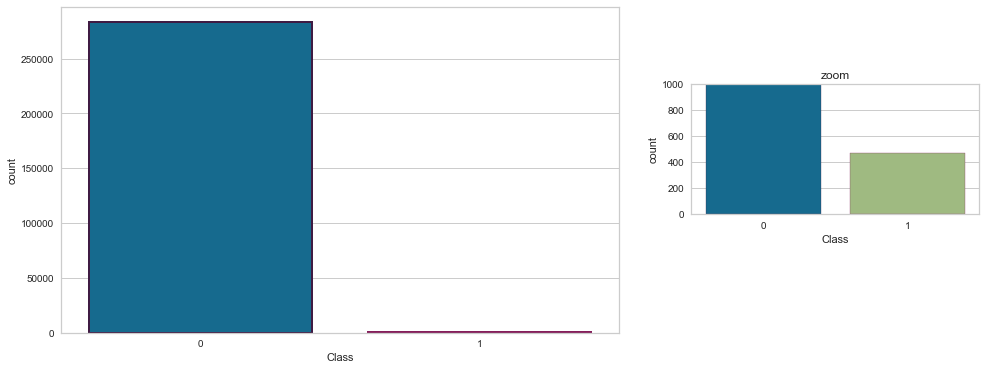

In [80]:
plt.figure(figsize = (10,6))
sns.countplot(df['Class'],linewidth=2,edgecolor=sns.color_palette("rocket", 5))
ax2 = plt.axes([1, 0.4, .4, .3], facecolor='w')
sns.countplot(data =df,  x = "Class", edgecolor=sns.color_palette("rocket", 5));
ax2.set_title('zoom')
ax2.set_ylim([0,1000])

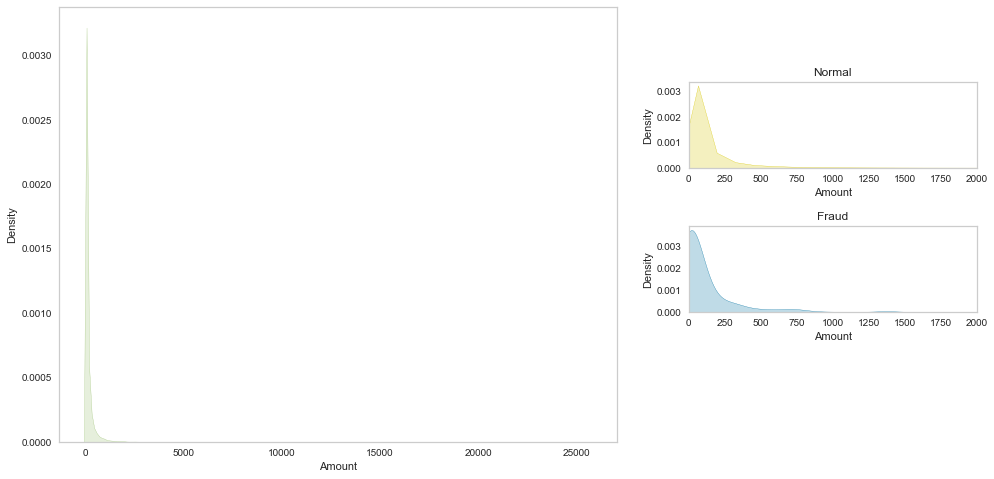

In [81]:
plt.figure(figsize = (10,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.kdeplot(df['Amount'],shade=True, color ="g")
ax2 = plt.axes([1, 0.35, .4, .15], facecolor='w')
sns.kdeplot(data =df[df["Class"] == 1],  x = "Amount", shade= True );
ax2.set_title('Fraud')
ax2.set_xlim([0,2000]);
ax3 = plt.axes([1, 0.6, .4, .15], facecolor='w')
sns.kdeplot(data =df[df["Class"] == 0],  x = "Amount",color= "y", shade= True );
ax3.set_title('Normal')
ax3.set_xlim([0,2000]);


(0.0, 172792.0)

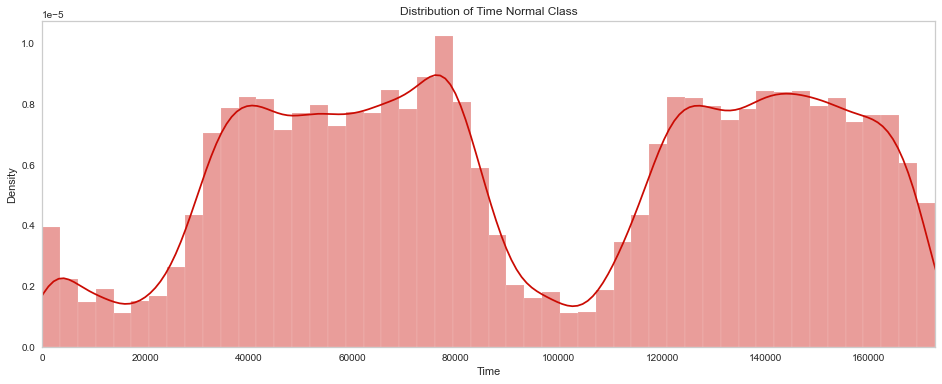

In [82]:
plt.figure(figsize = (16,6))
ax = sns.distplot(df[df["Class"] == 0].Time, color='r')
ax.set_title('Distribution of Time Normal Class')
ax.set_xlim([min(df.Time), max(df.Time)])

(0.0, 172792.0)

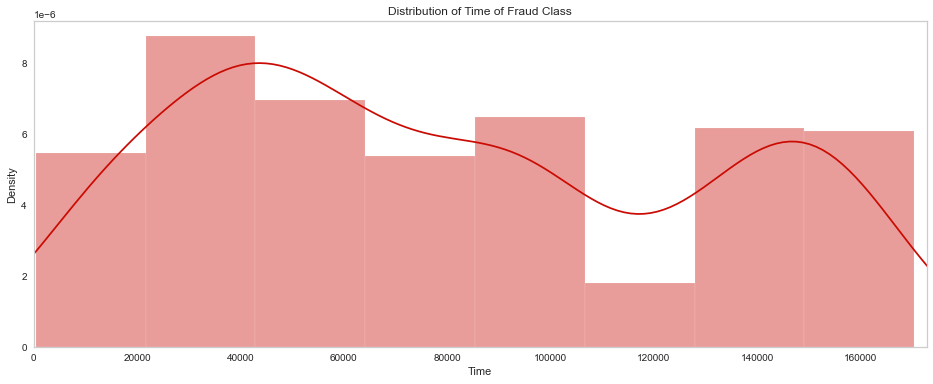

In [83]:
plt.figure(figsize = (16,6))
ax = sns.distplot(df[df["Class"] == 1].Time, color='r')
ax.set_title('Distribution of Time of Fraud Class')
ax.set_xlim([min(df.Time), max(df.Time)])

<AxesSubplot:>

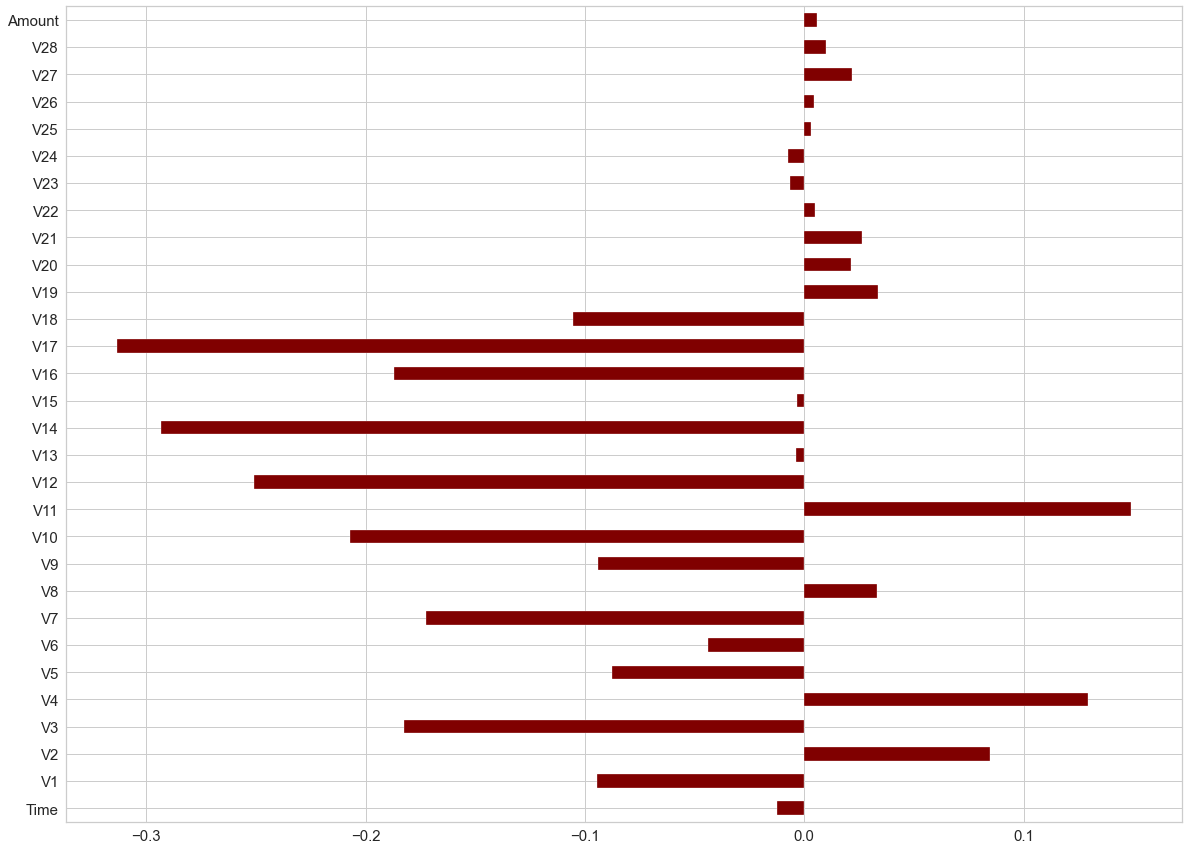

In [84]:
sns.set_style("whitegrid", {'axes.grid' : False})
df.drop(columns = ['Class']).corrwith(df.Class).plot.barh(
        figsize = (20, 15), fontsize = 15, grid = True, color = "maroon")

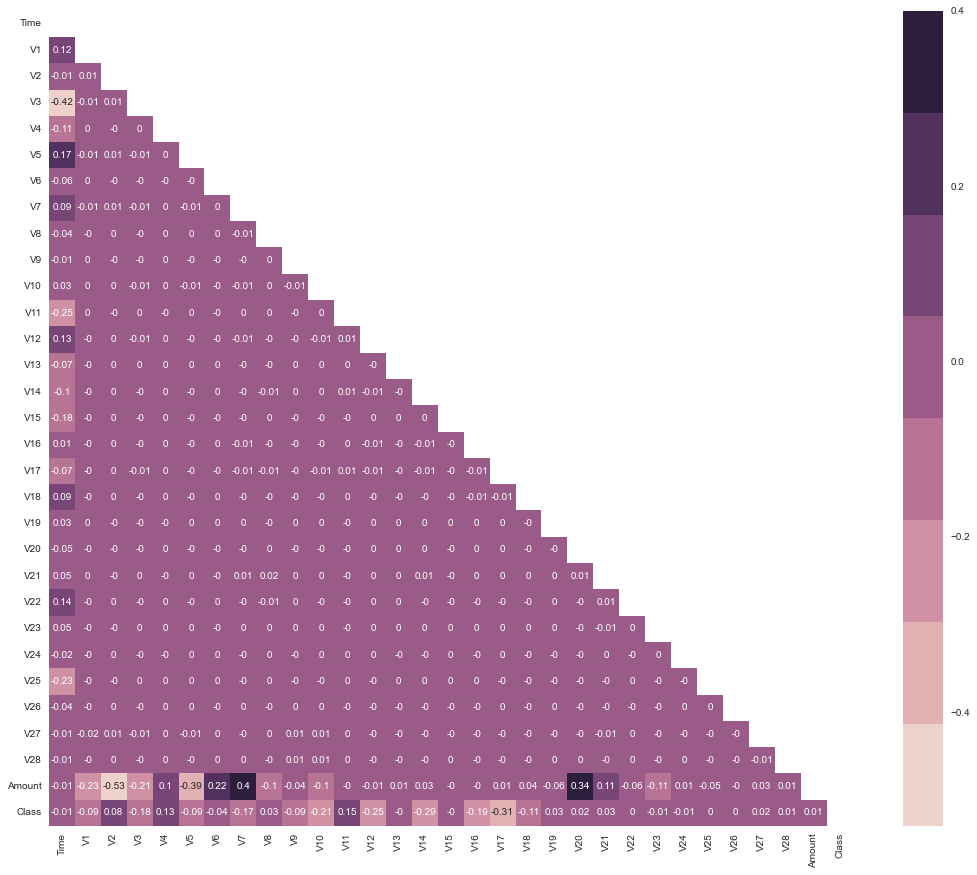

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 15))
matrix = np.triu(df.corr())
sns.heatmap(round(df.corr(),2), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix);

In [86]:
#plt.figure(figsize=(18, 15))
#sns.pairplot(df, hue = 'Class', vars = ['V17', 'V14',"V12",'Amount'] )

### Data Cleaning
Check Missing Values and Outliers

In [87]:
df.isna().sum().sum()

0

In [88]:
df.duplicated().sum()

0

In [89]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [90]:
def IQR_method (df,n,num_cols):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in num_cols:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [91]:
Outliers_IQR = IQR_method(df,1,num_cols)

Total number of outliers is: 473


In [92]:
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [93]:
df.shape, df_out.shape

((283726, 31), (202701, 31))

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Class', 'Time'], axis=1), 
                                                    df['Class'], stratify = df['Class'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((198608, 29), (85118, 29))

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [95]:
from deepchecks.tabular.suites import train_test_validation, model_evaluation, data_integrity
train = X_train.copy()
test = X_test.copy()
train["label"] = y_train
test["label"] = y_test

train_ds = Dataset(train, label="label")
test_ds = Dataset(test, label="label")

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
suite_result

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_BSVHMYVTB727UFK389D8HO5IR">Train Test Validat…

#### Scaling

In [96]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Model Training***

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

***ii. Model Training***

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iv.  Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.utils import class_weight
from yellowbrick.classifier import PrecisionRecallCurve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout
from livelossplot import PlotLossesKerasTF
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,KMeansSMOTE,SMOTE,RandomOverSampler,SVMSMOTE

***ii. Define Model***

In [98]:
df.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194795,130762.0,2.051944,-0.175715,-1.261152,0.197066,0.070033,-0.636801,0.014152,-0.109174,0.443144,0.267733,0.386833,0.518145,-0.787161,0.612643,-0.532361,0.269944,-0.6633,-0.114633,0.620744,-0.251983,-0.278526,-0.743995,0.278966,-0.515932,-0.293791,0.210823,-0.080766,-0.076735,1.98,0


***iii. Compile Model***

In [99]:
df.shape

(283726, 31)

In [100]:
y = df['Class']
X = df.drop(["Class"], axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.25, random_state=44, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                  test_size= 0.25, random_state=44, stratify=y_train)

In [101]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [102]:
scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [103]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                1984      
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 32)               

In [104]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5,
                           restore_best_weights = True)

In [105]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008347507358987, 1: 299.9906015037594}

***iv. Fit Model***

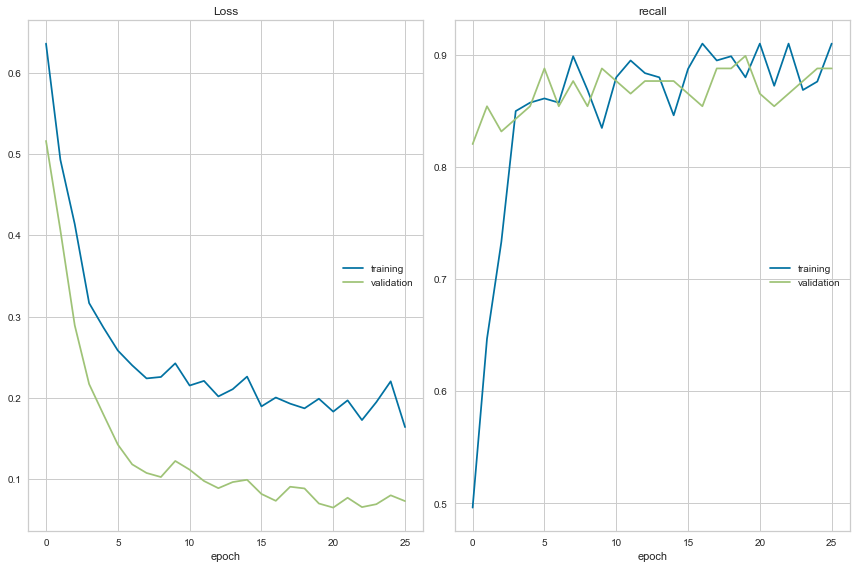

Loss
	training         	 (min:    0.164, max:    0.636, cur:    0.164)
	validation       	 (min:    0.065, max:    0.516, cur:    0.073)
recall
	training         	 (min:    0.496, max:    0.910, cur:    0.910)
	validation       	 (min:    0.820, max:    0.899, cur:    0.888)
1247/1247 [==============================] - 9s 7ms/step - loss: 0.1640 - recall: 0.9098 - val_loss: 0.0730 - val_recall: 0.8876
Epoch 26: early stopping


In [106]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=50,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

***v. Prediction and Model Evaluating***

In [107]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [108]:
eval_metric(model, X_train, y_train, X_test, y_test)

2217/2217 [==============================] - 4s 2ms/step
Test_Set
[[70458   356]
 [   14   104]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70814
           1       0.23      0.88      0.36       118

    accuracy                           0.99     70932
   macro avg       0.61      0.94      0.68     70932
weighted avg       1.00      0.99      1.00     70932


Train_Set
[[158513    816]
 [    21    245]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    159329
           1       0.23      0.92      0.37       266

    accuracy                           0.99    159595
   macro avg       0.62      0.96      0.68    159595
weighted avg       1.00      0.99      1.00    159595



***vi. Plot Precision and Recall Curve***

2217/2217 [==============================] - 4s 2ms/step


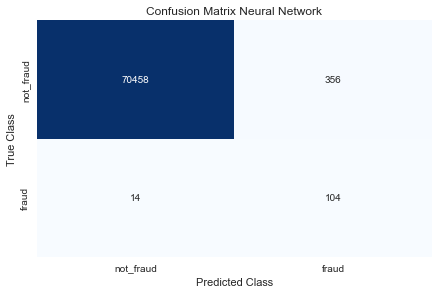

In [111]:
y_pred = model.predict(X_test) > 0.5
matrix_nn = confusion_matrix(y_test, y_pred)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

2217/2217 [==============================] - 4s 2ms/step


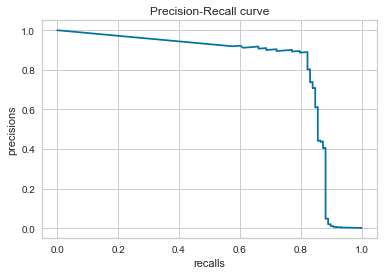

In [112]:
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [114]:
ANN_pre_score = average_precision_score(y_test, y_pred_proba)
ANN_f1 = f1_score(y_test, y_pred)
ANN_recall = recall_score(y_test, y_pred)
ANN_recall

0.8813559322033898

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### SMOT UNDER SAMPLİNG

In [115]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=1)

In [116]:
y = df['Class']
X = df.drop(["Class"], axis=1).values

In [117]:
X_under, y_under = undersample.fit_resample(X, y)
test = pd.DataFrame(y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

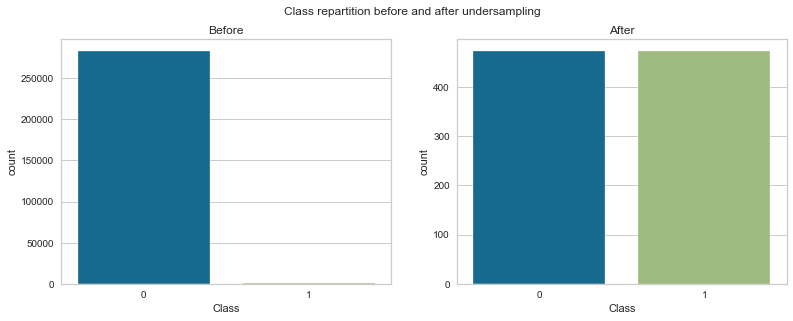

In [118]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, 
                                  test_size=0.25, random_state=44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                  test_size= 0.25, random_state=44)

In [120]:
scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [121]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(8, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1984      
                                                                 
 batch_normalization_16 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_17 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 32)               

In [122]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [123]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 1.0330739299610896, 1: 0.968978102189781}

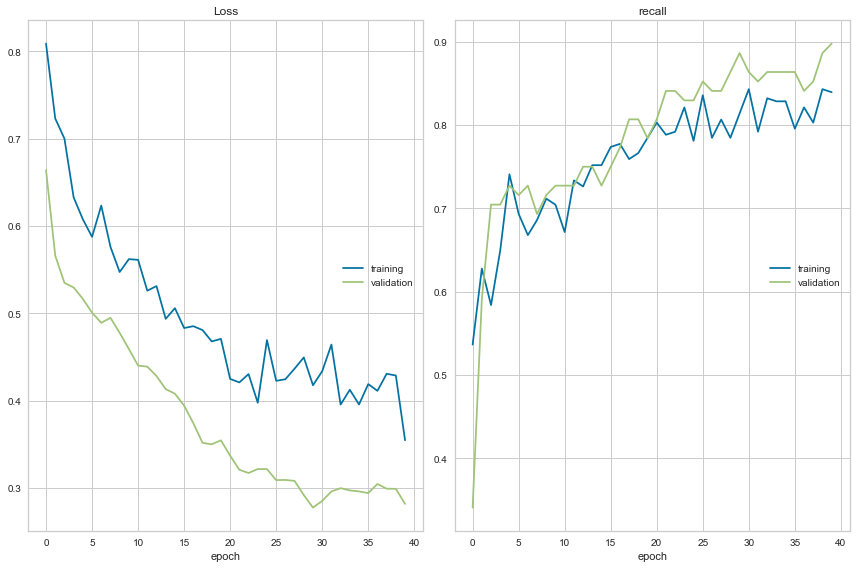

Loss
	training         	 (min:    0.355, max:    0.809, cur:    0.355)
	validation       	 (min:    0.278, max:    0.664, cur:    0.282)
recall
	training         	 (min:    0.536, max:    0.843, cur:    0.839)
	validation       	 (min:    0.341, max:    0.898, cur:    0.898)
107/107 [==============================] - 1s 10ms/step - loss: 0.3548 - recall: 0.8394 - val_loss: 0.2819 - val_recall: 0.8977
Epoch 40: early stopping


In [124]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=5,
          epochs=50,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

In [126]:
eval_metric(model, X_train, y_train, X_test, y_test)

8/8 [==============================] - 0s 5ms/step
Test_Set
[[117   9]
 [ 12  99]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       126
           1       0.92      0.89      0.90       111

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237


Train_Set
[[253   4]
 [ 28 246]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       257
           1       0.98      0.90      0.94       274

    accuracy                           0.94       531
   macro avg       0.94      0.94      0.94       531
weighted avg       0.94      0.94      0.94       531



8/8 [==============================] - 0s 2ms/step


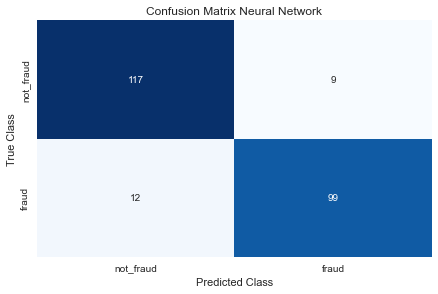

In [127]:
y_pred = model.predict(X_test) > 0.5
matrix_nn = confusion_matrix(y_test, y_pred)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

8/8 [==============================] - 0s 3ms/step


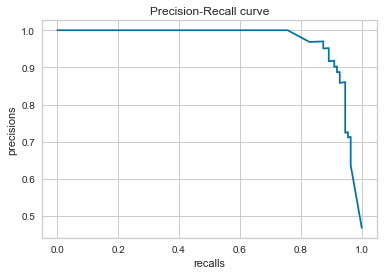

In [128]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [130]:
ANN_smot_under_pre_score = average_precision_score(y_test, y_pred_proba)
ANN_smot_under_f1 = f1_score(y_test, y_pred)
ANN_smot_under_recall = recall_score(y_test, y_pred)
ANN_smot_under_recall 

0.8918918918918919

### SMOT OVER SAMPLİNG

In [131]:
from imblearn.over_sampling import RandomOverSampler

In [132]:
oversample = RandomOverSampler(sampling_strategy=0.1, random_state=1)

In [133]:
y = df['Class']
X = df.drop(["Class"], axis=1).values

In [134]:
X_over, y_over = oversample.fit_resample(X, y)
test = pd.DataFrame(y_over, columns = ['Class'])

Text(0.5, 1.0, 'After')

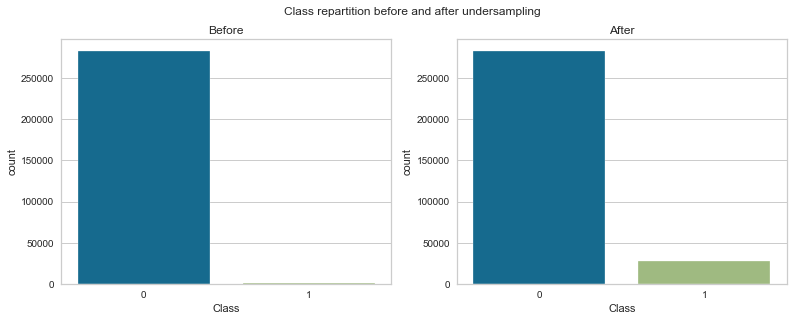

In [135]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, 
                                  test_size=0.25, random_state=44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                  test_size= 0.25, random_state=44)

In [147]:
scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [153]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                1984      
                                                                 
 batch_normalization_30 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_31 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_35 (Dropout)        (None, 32)               

In [154]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5,
                           restore_best_weights = True)

In [155]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5498036213971114, 1: 5.5197152935248175}

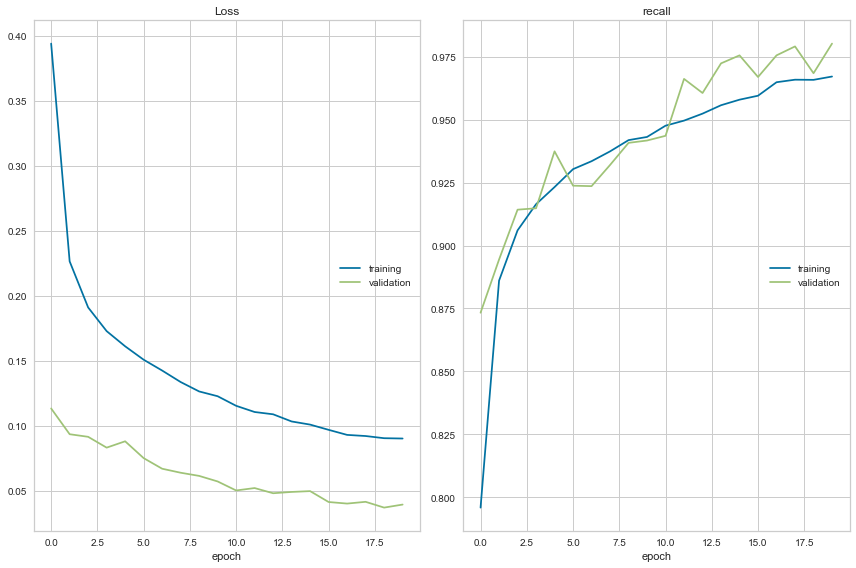

Loss
	training         	 (min:    0.090, max:    0.394, cur:    0.090)
	validation       	 (min:    0.037, max:    0.113, cur:    0.039)
recall
	training         	 (min:    0.796, max:    0.967, cur:    0.967)
	validation       	 (min:    0.873, max:    0.980, cur:    0.980)
343/343 [==============================] - 3s 10ms/step - loss: 0.0900 - recall: 0.9671 - val_loss: 0.0392 - val_recall: 0.9802


In [156]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size= 512,
          epochs=20,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()], class_weight=class_weights)

In [157]:
eval_metric(model, X_train, y_train, X_test, y_test)

2435/2435 [==============================] - 4s 2ms/step
Test_Set
[[69693  1105]
 [  153  6944]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70798
           1       0.86      0.98      0.92      7097

    accuracy                           0.98     77895
   macro avg       0.93      0.98      0.95     77895
weighted avg       0.99      0.98      0.98     77895


Train_Set
[[157050   2336]
 [   313  15563]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    159386
           1       0.87      0.98      0.92     15876

    accuracy                           0.98    175262
   macro avg       0.93      0.98      0.96    175262
weighted avg       0.99      0.98      0.99    175262



2435/2435 [==============================] - 4s 2ms/step


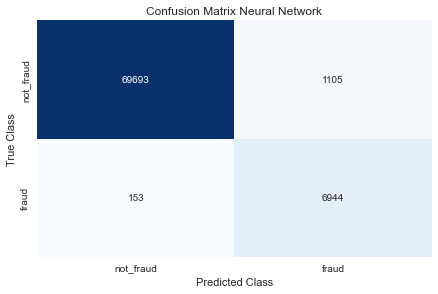

In [158]:
y_pred = model.predict(X_test) > 0.5
matrix_nn = confusion_matrix(y_test, y_pred)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

2435/2435 [==============================] - 5s 2ms/step


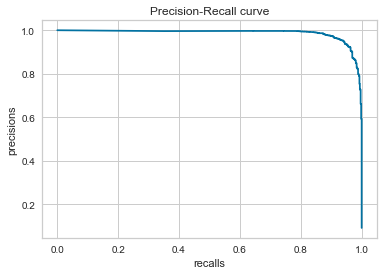

In [159]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [161]:
ANN_smot_over_pre_score = average_precision_score(y_test, y_pred_proba)
ANN_smot_over_f1 = f1_score(y_test, y_pred)
ANN_smot_over_recall = recall_score(y_test, y_pred)
ANN_smot_over_recall 

0.9784415950401578

### Optuna

In [162]:
import optuna
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam 

In [163]:
trial_metric = "Recall"
batch_size = 512
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    n_units3 = trial.suggest_int('n_units3', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))
    model.add(Dense(n_units2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(n_units3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model

def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=50,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [165]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)
study.best_params

[I 2023-03-05 03:48:42,879] A new study created in memory with name: no-name-733b84ed-ab3d-4f99-92ba-3cdbe8ad5866


Restoring model weights from the end of the best epoch: 3.
Epoch 8: early stopping


[I 2023-03-05 03:49:10,125] Trial 0 finished with value: 0.20304353535175323 and parameters: {'n_units1': 26, 'n_units2': 13, 'n_units3': 121, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 2.531155406289261e-08, 'w0': 0.0296224697173375, 'w1': 0.0325198369503232}. Best is trial 0 with value: 0.20304353535175323.
[I 2023-03-05 03:51:44,779] Trial 1 finished with value: 0.904043972492218 and parameters: {'n_units1': 67, 'n_units2': 61, 'n_units3': 49, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 7.839052278428706e-06, 'w0': 0.017656744304403223, 'w1': 0.4231454914452495}. Best is trial 1 with value: 0.904043972492218.


Restoring model weights from the end of the best epoch: 44.
Epoch 49: early stopping


[I 2023-03-05 03:55:04,622] Trial 2 finished with value: 0.9185571074485779 and parameters: {'n_units1': 86, 'n_units2': 111, 'n_units3': 102, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0013691105521471106, 'w0': 3.745465464980446, 'w1': 1.1565018638712554}. Best is trial 2 with value: 0.9185571074485779.


Restoring model weights from the end of the best epoch: 3.
Epoch 8: early stopping


[I 2023-03-05 03:55:31,681] Trial 3 finished with value: 0.5148654580116272 and parameters: {'n_units1': 17, 'n_units2': 53, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.4602515424636226e-06, 'w0': 1.7394559331227575, 'w1': 1.7964834774259257}. Best is trial 2 with value: 0.9185571074485779.


Restoring model weights from the end of the best epoch: 36.
Epoch 41: early stopping


[I 2023-03-05 03:58:02,425] Trial 4 finished with value: 0.9711145758628845 and parameters: {'n_units1': 21, 'n_units2': 125, 'n_units3': 75, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0012829991971385186, 'w0': 0.012925716436502406, 'w1': 2.833728890201826}. Best is trial 4 with value: 0.9711145758628845.


{'n_units1': 21,
 'n_units2': 125,
 'n_units3': 75,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 0.0012829991971385186,
 'w0': 0.012925716436502406,
 'w1': 2.833728890201826}

In [166]:
unit1, unit2, unit3, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['n_units3'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(unit2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(unit3, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          batch_size=512,
          epochs=20,
          callbacks=[early_stop],
          verbose=1,
         class_weight={0: w0, 1: w1})

Epoch 1/20
343/343 [==============================] - 8s 12ms/step - loss: 0.0476 - recall: 0.9472 - val_loss: 0.7515 - val_recall: 0.9918
Epoch 2/20
343/343 [==============================] - 4s 11ms/step - loss: 0.0262 - recall: 0.9892 - val_loss: 0.7154 - val_recall: 0.9893
Epoch 3/20
343/343 [==============================] - 4s 11ms/step - loss: 0.0232 - recall: 0.9910 - val_loss: 0.6987 - val_recall: 0.9923
Epoch 4/20
343/343 [==============================] - 4s 11ms/step - loss: 0.0208 - recall: 0.9915 - val_loss: 0.6594 - val_recall: 0.9908
Epoch 5/20
343/343 [==============================] - 4s 11ms/step - loss: 0.0196 - recall: 0.9914 - val_loss: 0.6045 - val_recall: 0.9908
Epoch 6/20
343/343 [==============================] - 4s 11ms/step - loss: 0.0176 - recall: 0.9919 - val_loss: 0.6085 - val_recall: 0.9908
Epoch 7/20
343/343 [==============================] - 4s 11ms/step - loss: 0.0168 - recall: 0.9917 - val_loss: 0.5286 - val_recall: 0.9908
Epoch 8/20
343/343 [=======

In [167]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2435/2435 [==============================] - 5s 2ms/step
[[62544  8254]
 [   31  7066]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     70798
           1       0.46      1.00      0.63      7097

    accuracy                           0.89     77895
   macro avg       0.73      0.94      0.78     77895
weighted avg       0.95      0.89      0.91     77895



2435/2435 [==============================] - 4s 2ms/step


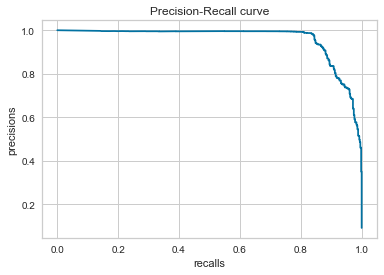

In [168]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

2435/2435 [==============================] - 5s 2ms/step


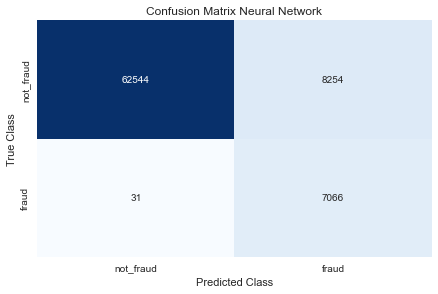

In [170]:
y_pred_proba = model.predict(X_test)
matrix_nn = confusion_matrix(y_test, y_pred)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [171]:
optuna_smot_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_smot_f1 = f1_score(y_test, y_pred)
optuna_smot_recall = recall_score(y_test, y_pred)
optuna_smot_recall

0.9956319571649993

## Model Comparison

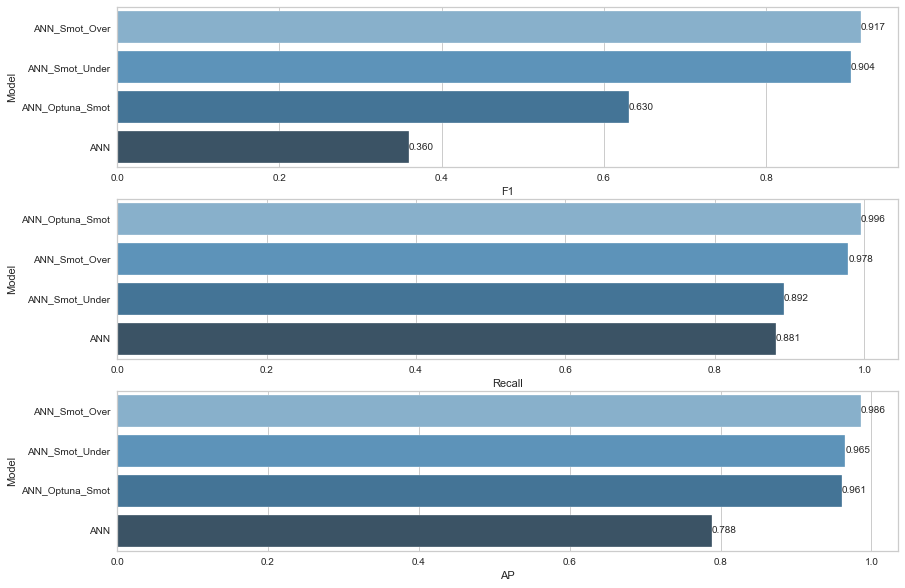

In [172]:
compare = pd.DataFrame({
    "Model": ["ANN","ANN_Smot_Under","ANN_Smot_Over","ANN_Optuna_Smot"],
    "F1": [ANN_f1, ANN_smot_under_f1, ANN_smot_over_f1, optuna_smot_f1],
    "Recall": [ANN_recall ,ANN_smot_under_recall,ANN_smot_over_recall, optuna_smot_recall],
    "AP": [ANN_pre_score,ANN_smot_under_pre_score, ANN_smot_over_pre_score, optuna_smot_pre_score]
})




def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___